# What is A/B Testing?

**A/B testing** is a type of experiment in which you split your web traffic or user base into two groups, and show two different versions of a web page, app, email, and so on, with the goal of comparing the results to find the more successful version. With an A/B test, one element is changed between the original (a.k.a, “the control”) and the test version to see if this modification has any impact on user behavior or conversion rates.

**A/B testing** is an important element in decision making, especially when making business decisions. It is because often the assumed results are different from the facts that occur in the real world. When this happens, it can cause "disaster" in a company.

From a data scientist’s perspective, A/B testing is a form of statistical hypothesis testing or a significance test.

The steps to perform A/B testing are divided into 6 parts, namely:
1. Defining Goals
2. Identifying Metrics
3. Developing Hypothesis
4. Setting up Experiment
5. Running the Experiment
6. Analysing A/B Testing Results

# Defining Goals, Identifying Metrics, and Developing Hypothesis

For this project, we will run an A/B test to determine which is the better product ad pop-up layout between 2 designs. The 2 designs that will be tested are shown below.

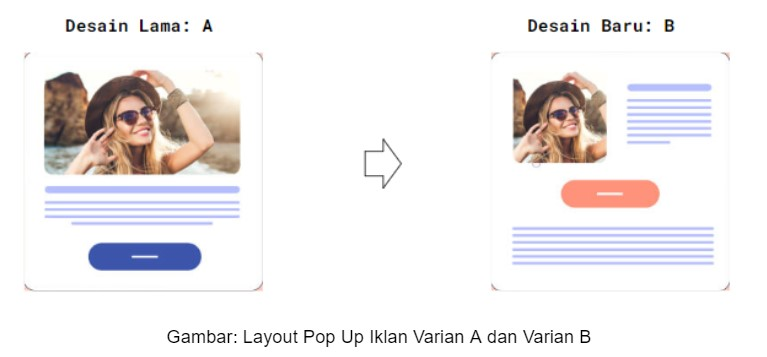

From the image, we can see that Design A is the old design (control group) and Design B is the new design (treatment group).

Assuming that the marketing manager said that Design B will increase the click through rate (CTR) average compared to Design A. In this case, **CTR** is the **metrics** that we will analyze.

We can develop the **hypothesis**:

H0 : The average CTR of Design B is less than or equal to the average CTR of Design A, μB ≤ μA

Ha : The average CTR of Design B is more than the average CTR of Design A, μB > μA

# Setting Up Experiment

In the preparation of the experiment, there are 4 stages that must be carried out, which are determining the sample size, determining the duration of the A/B test, defining the control and treatment groups, and randomization.

You can read how to determine the sample size of an A/B test [here](https://towardsdatascience.com/required-sample-size-for-a-b-testing-6f6608dd330a) and how to determine the duration of an A/B test [here](https://www.abtasty.com/blog/how-long-run-ab-test/).

The **control group** is the **old feature** that you assume needs a change and the **treatment group** is the **new feature**. Randomization means that the control group and the treatment group are tested in a randomly distributed segment.

# Running the Experiment

The experiment ran for 10 days, from November 13, 2021 to November 22, 2021 and spread to 59,984 different users. The experiment result is stored in a CSV file to be analyzed later.

Now that we have the A/B test result, let's begin to process it. Like usual, let's start by importing some necessary libraries and read the dataset.

In [1]:
pip install pingouin

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 185.4/185.4 kB 821.8 kB/s eta 0:00:00
  Preparing metadata (setup.py) ... - done
  Preparing metadata (setup.py) ... - done
  Created wheel for pingouin: filename=pingouin-0.5.2-py3-none-any.whl size=196206 sha256=b8b8f01b5afbd700fc417bdc6109301e35b6bcd310e6b10c1d475d743f7ad5d9
  Stored in directory: /root/.cache/pip/wheels/11/5a/63/a6d32fc26fa462c731f65480bfb98ff7bd39b8ebcb4bc6c2fe
  Created wheel for littleutils: filename=littleutils-0.2.2-py3-none-any.whl size=7048 sha256=286a8e74fff7ca71cbbe617441d84185bb23f89e1b8152d68e92af643938e680
  Stored in directory: /root/.cache/pip/wheels/d6/64/cd/32819b511a488e4993f2fab909a95330289c3f4e0f6ef4676d
Successfully built pingouin littleutils
Note: you may need to restart the kernel to use updated packages.


In [2]:
import numpy as np
import pandas as pd
import pingouin as pg
from statsmodels.stats.weightstats import ttost_paired
from scipy import stats

In [3]:
data = pd.read_csv('../input/ctr-a-b/ctr_a_b.csv')
data

,userid,dt,groupid,ctr
0,60389fa7-2d71-4cdf-831c-c2bb277ffa1e,2021-11-13,0,31.81
1,b59cb225-d160-4851-92d2-7cc8120a2f63,2021-11-13,0,30.46
2,aa336050-934e-453f-a5b0-dd881fcd114e,2021-11-13,0,34.25
3,8df767f4-a10f-4322-a722-676b7e02b372,2021-11-13,0,34.92
4,a74762ed-4da0-42ab-91d2-40d7e808dfe9,2021-11-13,0,34.95
...,...,...,...,...
447597,45f6dc40-112f-4673-8191-0817c53b7b32,2021-11-22,1,35.42
447598,7eaa349d-57a1-4ed1-a55d-7a381c54240e,2021-11-22,1,37.69
447599,08e8b5be-20e6-40ac-80a3-f84e7b1d4fe6,2021-11-22,1,36.72
447600,27df6c18-5f0a-43cc-bdb5-daf0d1949229,2021-11-22,1,40.10


The above table shows the A/B test results, consist of 4 columns—**"userid"** that differentiates one user from another, **"dt"** that indicates the date of experiment occured, **"groupid"** consists of **0 for Design A** and **1 for Design B**, and **"ctr"** that indicates the metrics result—and 447,602 rows.

In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 447602 entries, 0 to 447601
Data columns (total 4 columns):
 #   Column   Non-Null Count   Dtype  
---  ------   --------------   -----  
 0   userid   447602 non-null  object 
 1   dt       447602 non-null  object 
 2   groupid  447602 non-null  int64  
 3   ctr      447601 non-null  float64
dtypes: float64(1), int64(1), object(2)
memory usage: 13.7+ MB


We can see from the above dataset info, there's one **null value in ctr column**. We can just drop the null column since it's only one null value. We can also change the groupid column name into design and change the value to a and b, instead of 0 and 1, to make it easier for us to understand the data.

In [5]:
data['ctr'] = data['ctr'].dropna()
data['dt'] = pd.to_datetime(data['dt'])
data['groupid'] = data['groupid'].replace([0, 1], ['a', 'b'])
data = data.rename(columns = {'groupid':'design'})

data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 447602 entries, 0 to 447601
Data columns (total 4 columns):
 #   Column  Non-Null Count   Dtype         
---  ------  --------------   -----         
 0   userid  447602 non-null  object        
 1   dt      447602 non-null  datetime64[ns]
 2   design  447602 non-null  object        
 3   ctr     447601 non-null  float64       
dtypes: datetime64[ns](1), float64(1), object(2)
memory usage: 13.7+ MB


Now that all the datatypes are correct, let's check the unique values for every columns.

In [6]:
data['dt'].unique()

array(['2021-11-13T00:00:00.000000000', '2021-11-14T00:00:00.000000000',
       '2021-11-15T00:00:00.000000000', '2021-11-16T00:00:00.000000000',
       '2021-11-17T00:00:00.000000000', '2021-11-18T00:00:00.000000000',
       '2021-11-19T00:00:00.000000000', '2021-11-20T00:00:00.000000000',
       '2021-11-21T00:00:00.000000000', '2021-11-22T00:00:00.000000000'],
      dtype='datetime64[ns]')

In [7]:
data['design'].unique()

array(['a', 'b'], dtype=object)

In [8]:
len(data['userid'].unique())

59984

In **"dt"** column there are only 10 unique values—indicate every dates of experiment, while there are only 2 unique values in **"groupid"** colum. We can also see that the total user that get to experience the test are 59,984 users. To run the analysis, let's group the dataset by the date and the group id with the average ctr as the values.

In [9]:
group = data.groupby(['dt','design']).mean('ctr')
group

ctr
dt         design           
2021-11-13 a       32.980938
           b       38.004073
2021-11-14 a       33.022976
           b       38.002105
2021-11-15 a       32.981540
           b       37.993792
2021-11-16 a       32.992757
           b       38.000736
2021-11-17 a       32.989979
           b       38.016065
2021-11-18 a       32.998062
           b       38.000598
2021-11-19 a       32.999277
           b       37.993726
2021-11-20 a       32.984355
           b       37.992482
2021-11-21 a       33.013920
           b       37.991367
2021-11-22 a       33.006161
           b       37.987518

We have the mean ctr data for every date and every group, now we can begin to run the analysis. For this project, let's analyze the ctr results using **t-test**.

# T-Test

A **t-test** is a statistical test that is used to compare the means of two groups. It is often used in hypothesis testing to determine whether a process or treatment actually has an effect on the population of interest, or whether two groups are different from one another.

The **t-test** is a parametric test of difference, meaning that it makes the same assumptions about your data as other parametric tests. The **t-test** assumes your data:
1. are independent
2. are (approximately) normally distributed.
3. have a similar amount of variance within each group being compared (a.k.a. homogeneity of variance)

When choosing a **t-test**, you will need to consider two things: whether the groups being compared come from a single population or two different populations, and whether you want to test the difference in a specific direction.

**One-sample, two-sample, or paired t-test?**

If the groups come from a single population (e.g. measuring before and after an experimental treatment), perform a paired t-test.

If the groups come from two different populations (e.g. two different species, or people from two separate cities), perform a two-sample t-test (a.k.a. independent t-test).

If there is one group being compared against a standard value (e.g. comparing the acidity of a liquid to a neutral pH of 7), perform a one-sample t-test.

**One-tailed or two-tailed t-test?**

If you only care whether the two populations are different from one another, perform a two-tailed t-test.

If you want to know whether one population mean is greater than or less than the other, perform a one-tailed t-test.

Since we are interested in the difference between two variables (Design A and Design B) for the same subject (CTR), so we'll perform **paired t-test**. There are 2 different methods to run paired t-test in Python. We can use **SciPy** and **Pingouin**. But first, we have to subset the data into two groups by the design in order to run the t-test.

In [10]:
design_a = group.query('design == "a"')['ctr']
design_b = group.query('design == "b"')['ctr']

# SciPy T-Test

In [11]:
sci = stats.ttest_rel(design_a, design_b)
sci

Ttest_relResult(statistic=-895.2009158095975, pvalue=1.3790061982624585e-23)

# Pingouin T-Test

Before running the Pingouin t-test, we have run **Levene's statistic test** to determine the variances homogeneity of the subsets to determine the right correction to choose.

In [12]:
stats.levene(design_a, design_b)

LeveneResult(statistic=2.4594148675637078, pvalue=0.13423382145770546)

The above results show the statistic value and the p-value of Levene's test. The statistic test is 2.46 while the p-value is 0.13. Since the p-value is higher than the threshold (0.05), we can safely say that **the variance in ctr between the two designs is not significantly different**.

In [13]:
ping = pg.ttest(design_a, design_b, paired = True, correction = False)
ping

,T,dof,alternative,p-val,CI95%,cohen-d,BF10,power
T-test,-895.200916,9,two-sided,1.379006e-23,"[-5.01, -4.99]",434.071271,6.274e+13,1.0


# Analysis of T-Test for A/B Testing

We have generated the t-test results from two different t-test methods and both of them giving the same results in t-score, which is -895.20, and also the same results in p-value, which is 1.38 x 10^-23. The p-value is way less than the threshold, this means that we can reject the null hypothesis.

Remember our hypothesis:

H0 : The average CTR of Design B is less than or equal to the average CTR of Design A, μB ≤ μA

Ha : The average CTR of Design B is more than the average CTR of Design A, μB > μA

Since we can **reject the null hypothesis**, means the **alternative hypothesis is true**. So, our marketing manager is right, design B can increase the CTR.

To support the p-value hypothesis, we can see the **Cohen's *d*** variable from Pingouin table. Cohen's *d* is one of the measurement to calculate the **effect size**. Effect size tells you how meaningful the relationship between variables or the difference between groups is. It indicates the practical significance of a research outcome.

Cohen’s *d* is designed for comparing two groups. It takes the difference between two means and expresses it in standard deviation units. It tells you how many standard deviations lie between the two means.

Effect sizes can be categorized into **small**, **medium**, or **large** according to Cohen’s criteria. Cohen’s criteria for small, medium, and large effects differ based on the effect size measurement used. Cohen’s *d* can take on any number between 0 and infinity. In general, the greater the Cohen’s *d*, the larger the effect size.

We have 434.07 for the value of Cohen's *d* criteria. This means that there is a practical significance successful in changing the design from Design A to Design B.

Another criteria to support the analysis is the **BF10** variable from Pingouin table. BF10 indicates a **Bayes Factor** in comparing alternative hypothesis (Ha/H1) and null hypothesis (H0). **Bayes Factor** is the ratio of the likelihood of one particular hypothesis to the likelihood of another. It can be interpreted as a measure of the strength of evidence in favor of one theory among two competing theories.

We have 6.27 x 10^13 for the Bayes Factor, means that we have extreme evidence for H1. It isa save to say that we the alternate hypothesis is true.

You can read more about Bayes Factor interpretation [from this book](https://www.google.com/books/edition/Bayesian_Cognitive_Modeling/50tkAgAAQBAJ?hl=en&gbpv=0).

# Conclusion

We have run an A/B test to see the average/mean of the CTR for two different designs. From the t-test, we get p-value lower than the threshold, large Cohen's d** criteria, and high Bayes Factor, so the team can change the ad pop-up layout design from design A to design B to engage more people in clicking the ad.